<a href="https://colab.research.google.com/github/longbui23/Amazon-Sentiment-Analysis/blob/main/MultivariateRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTIVARIATE REGRESSION

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis


## 1) Import packages and data

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
sentiment_df = pd.read_csv('Data/clean_data.csv')
sentiment_df.head()

,Unnamed: 0.1,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,sentimentScore,Review Length
0,0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,0.9430,374.0
1,1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,0.8731,214.0
2,2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,0.4927,12.0
3,3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,0.8750,76.0
4,4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,0.4215,223.0


# 2. sentimentScore Regression

Since the data points is not normally distributed we will try to find different methods such as normalizing data, removing outliers, or bucketing to find the best correlations between different attributes with sentiment score.

### Multivariate Regression

In [34]:
# Define the columns to be scaled
columns_to_scale = ['Review Length', 'Review Votes', 'Price', 'Rating']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
sentiment_df_scaled = sentiment_df.copy()  # Create a copy of the original DataFrame
sentiment_df_scaled[columns_to_scale] = scaler.fit_transform(sentiment_df_scaled[columns_to_scale])

# Define the independent variables (features) and the dependent variable
X_scaled = sentiment_df_scaled[columns_to_scale]
y = sentiment_df_scaled['sentimentScore']

# Fit the multivariate regression model
model_scaled = sm.OLS(y, sm.add_constant(X_scaled)).fit()  # Add constant term

# Print out the summary table
print(model_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:         sentimentScore   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                 2.029e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:24:28   Log-Likelihood:            -2.2868e+05
No. Observations:              397106   AIC:                         4.574e+05
Df Residuals:                  397101   BIC:                         4.574e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0293      0.002     18.997

In [37]:
# Define the independent variables (features) and the dependent variable
X = sentiment_df[['Review Length', 'Review Votes', 'Price', 'Rating']]
y = sentiment_df['sentimentScore']

# Fit the multivariate regression model
model = sm.OLS(y, X).fit()

# Print out the summary table
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         sentimentScore   R-squared (uncentered):                   0.518
Model:                            OLS   Adj. R-squared (uncentered):              0.518
Method:                 Least Squares   F-statistic:                          1.065e+05
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        06:37:23   Log-Likelihood:                     -2.2982e+05
No. Observations:              397106   AIC:                                  4.597e+05
Df Residuals:                  397102   BIC:                                  4.597e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

### Polynominal Regression

In [8]:
# Calculate the average values for 'Review Votes' and 'sentimentScore'
avg_review_votes = sentiment_df['Review Votes'].mean()
avg_sentiment_score = sentiment_df['sentimentScore'].mean()

# Replace null values with the average values
sentiment_df['Review Votes'].fillna(avg_review_votes, inplace=True)
sentiment_df['sentimentScore'].fillna(avg_sentiment_score, inplace=True)

In [9]:
sentiment_df['Review_Length_log'] = sentiment_df['Review Length'].apply(lambda x: np.log(x) if x > 0 else 0)

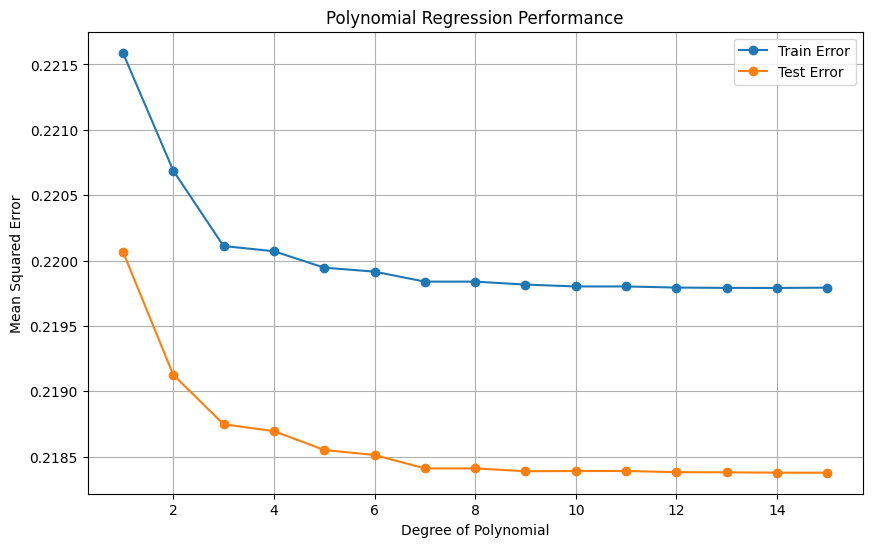

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(sentiment_df['Review_Length_log'], sentiment_df['sentimentScore'], test_size=0.2, random_state=42)

# Define a range of degrees
degrees = np.arange(1, 16)

# Initialize lists to store performance metrics
train_errors = []
test_errors = []

# Loop through each degree
for degree in degrees:
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train.values.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.values.reshape(-1, 1))

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate mean squared error for train and test sets
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot performance metrics against degrees
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression Performance')
plt.legend()
plt.grid(True)
plt.show()


# 3.ReviewVotes Regression

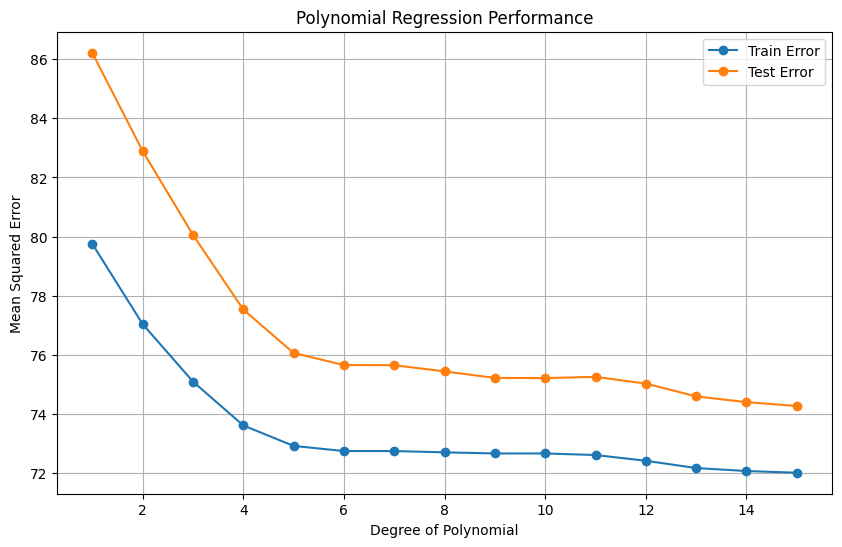

In [41]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(sentiment_df['Review_Length_log'], sentiment_df['Review Votes'], test_size=0.2, random_state=42)

# Define a range of degrees
degrees = np.arange(1, 16)

# Initialize lists to store performance metrics
train_errors = []
test_errors = []

# Loop through each degree
for degree in degrees:
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train.values.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.values.reshape(-1, 1))

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate mean squared error for train and test sets
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot performance metrics against degrees
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression Performance')
plt.legend()
plt.grid(True)
plt.show()


Polynomial Equation: Review Vote = 0.00 + (13.47 * Review_Length^1) + (-10.29 * Review_Length^2) + (3.30 * Review_Length^3) + (-0.47 * Review_Length^4) + (0.02 * Review_Length^5)
R-squared: 0.12387616493512421


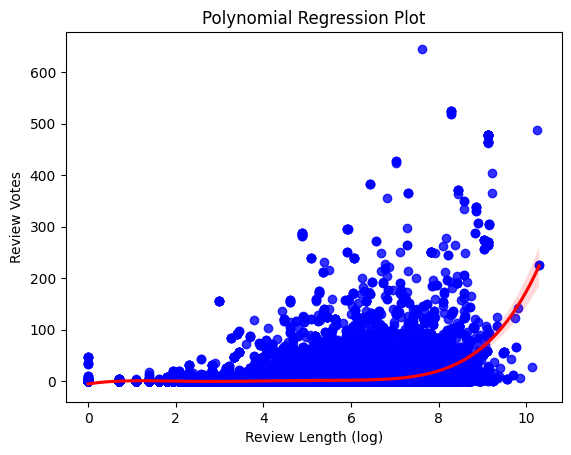

In [15]:
# Degree of polynomial regression
degree = 5

# Fit polynomial regression model
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(sentiment_df['Review_Length_log'].values.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, sentiment_df['Review Votes'])

# Extract coefficients
coefficients = model.coef_

# Construct polynomial equation
equation = f'Review Vote = {coefficients[0]:.2f}'
for i in range(1, len(coefficients)):
    equation += f' + ({coefficients[i]:.2f} * Review_Length^{i})'

print("Polynomial Equation:", equation)

# Calculate R-squared
y_pred = model.predict(X_poly)
r_squared = r2_score(sentiment_df['Review Votes'], y_pred)
print("R-squared:", r_squared)

# Plot the polynomial regression
sns.regplot(data=sentiment_df, x='Review_Length_log', y='Review Votes', order=degree, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Polynomial Regression Plot')
plt.xlabel('Review Length (log)')
plt.ylabel('Review Votes')
plt.show()
